참고할만한 사이트 : http://superkong1.tistory.com/11 

의사 결정 트리(Decision Tree)는 회귀 또는 분류를 수행할 수 있는 지도 모델(supervised model)이다.

- Years(x축): 메이저 리그에서 플레이한 연도의 수
- Hits(y축): 전년도에 선수의 히트 수
- Salary(컬러): 낮은 급여는 파란색/녹색, 높은 급여는 빨간색/노란색

![](https://ws3.sinaimg.cn/large/006tNbRwgy1fyarygvdhbj30ka0h8n20.jpg)

앞의 데이터는 훈련 데이터다. 목적은 year와 Hits에 기초해 미래의 선수들 급여를 예측하는 모델을 만드는 것이다. 의사 결정 트리는 서로 비슷하게 달리 작동하는 데이터 포인트를 세그먼트별로 나누기 위해 데이터를 분할하는 것을 목표로 한다.

트리는 가장 정확한 예측을 가능하게 하기 위해 이러한 분할을 배수로 만든다. 앞의 데이터를 위해 만들어진 트리를 살펴보자.

![](https://ws1.sinaimg.cn/large/006tNbRwgy1fyas0ge0qkj30dc0dqwfa.jpg)

트리는 위에서 아래로 읽는다.
- 첫 번째 분할은 Years < 4.5, 분할 법칙이 참일 때 왼쪽 분기를 따른다. 분할 법칙이 거짓일 때 오른쪽 분기를 따른다. 따라서 새로운 선수의 경우 4.5년 미만으로 경기를 한다면 왼쪽 분기로 내려갈 것이다.
- 왼쪽 분기의 선수는 평균 급여가 166,000 이지만 계산하기 편하게 1000으로 나눈 후 로그 변환
- 오른쪽 분기의 선수는 Hits < 117.5로 분할해 선수를 두 개의 추가 급여 영역, \$ 403,000(6.00으로 변환) 및 \$ 846,000(6.74)으로 나눔

이 트리는 단지 예측만을 제공하지 않고, 데이터에대한 좀 더 많은 정보를 의미한다.
- 리그에서 연도 수가 급여 결정에 있어 가장 중요한 요소며, 연도 수가 작으면 연봉이 작은 것과 관련이 있는 것으로 보인다.
- 선수가 오랫동안(<4.5) 경기를 하지 않은 경우 선수의 히트 수는 급여와 관련해 중요한 요소가 아니다.
- 리그에서 5년 이상 플레이한 선수의 경우 히트는 급여 결정의 중요한 요소다.
- 트리는 대답을 내리기 전에 두 가지 결정만 내렸다(두 가지를 트리의 깊이라고 한다.)

### 컴퓨터가 회귀 트리를 어떻게 만들까?

현대의 의사 결정 트리 알고리즘은 재귀적 이진 분할(recursive binary splitting)방식 사용

1. 프로세스가 트리의 맨 위에서 시작
2. 모든 특징에 대해 모든 가능한 분할을 검사하고, 결과 트리가 가능한 한 가장 작은 평균 제곱 오차(MSE)를 갖게 특징과 분할을 선택. 알고리즘은 그 분할을 만든다.
3. 그러면 두 개의 결과 영역을 검사하고 MSE를 최소화하기 위해 단일 분할(영역 중 하나에서)을 다시 수행한다.
4. 정지 기준이 충족될 때까지 3단계를 반복한다.
    - 최대 트리 깊이(리프에 도달하기 위해 필요한 최대 분할 수)
    - 리프(최종) 노드의 최소 관측 수

분류 트리의 경우 알고리즘은 최적화하려는 측정 지표의 가장 큰 차이점과 매우 유사하다. MSE는 회귀 문제에만 존재하기 때문에 사용할 수 없다. 그러나 정확성 대신에 분류 트리는 지니 지수(gini index)또는 엔트로피(entropy)를 최적화한다.

### 컴퓨터가 분류 트리를 어떻게 맞출까?

회귀 트리와 마찬가지로 분류 트리는 측정 지표(이 경우 지니 지수)를 최적화하고 이러한 최적화를 위한 가장 좋은 분할을 선택해서 만들어진다.

좀 더 공식적으로 각 노드에서 트리는 다음 단계를 수행한다.

1. 데이터의 순도를 계산한다.
2. 후보 분할을 선택한다.
3. 분할 후 데이터의 순도를 계산한다.
4. 모든 변수에 대해 반복한다.
5. 순도가 가장 많이 증가하는 변수를 선택한다.
6. 정지 기준이 일부 충족될 때까지 각 분할을 반복한다.

인구 통계학적 특징을 고려해 호화 유람선에 승선해서 사망할 가능성, 우도를 예측한다고 가정하자.  
25명이 승선해서 그중 10명은 살아남았고 15명은 죽었다고 가정하자.  
무엇보다도 먼저 지니 계수를 계산한다.  

![](https://ws3.sinaimg.cn/large/006tNbRwgy1fyaslmshl8j30aw0d8gln.jpg)

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyaso03134j30cm02wt8t.jpg)

이 공식을 적용해서 데이터를 구하면 0.48이라는 데이터셋의 순도가 나온다.

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyasw0o006j30ba02edfs.jpg)

이제 설명에 대한 잠재적 분할을 고려해보자. 먼저 성별에 대한 지니 계수를 계산한다면?

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyat48u3vsj30fc06674k.jpg)

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyat4kulu4j30kk0bcgmh.jpg)

각 성별에 대한 지니 지수가 생기면 다음과 같이 전체 성별에 대한 지니 지수를 계산한다.

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyat80pt09j30y6026jrr.jpg)

성별로 나누는 지니 지수는 0.27이다. 그런 다음 세 가지 잠재적 분할에 대해 이 프로시저를 수행한다.
- 성별(남성 또는 여성)
- 승선한 형제의 수(0 또는 1+)
- 클래스(1, 2대 3)

다음 표는 분류 의사 결정 트리와 회귀 이사 결정 트리의 차이점을 간단히 요약

![](https://ws1.sinaimg.cn/large/006tNbRwgy1fyatgpfi1dj314u08yq58.jpg)

In [1]:
# 데이터를 읽는다.
import pandas as pd

In [2]:
titanic = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv', delimiter='\t')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 여성을 0으로 남성을 1로 인코딩
titanic['Sex'] = titanic.Sex.map({'female':0,'male':1})

# 중간 연령의 나이에 대해 누락된 값을 입력
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# Embarked에 대한 더미 변수의 DataFrame을 만든다.
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

#원복 데이터프레임과 더미 데이터 프레임을 연결
titanic = pd.concat([titanic, embarked_dummies], axis=1)

#X와 Y를 정의한다.
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

X = titanic[feature_cols]
y = titanic.Survived

X.head()

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,0,1
1,1,0,38.0,0,0
2,3,0,26.0,0,1
3,1,0,35.0,0,1
4,3,1,35.0,0,1


특징으로 클래스, 성별, 연령 탑승한(embarked) 도시에 대한 더미 변수를 사용하려고 한다.

In [10]:
# 모든 데이터에 대해 max_depth = 3인 분류를 맞춘다.
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

max_depth는 트리의 깊이에 대한 제한이다. 모든 데이터 포인트에 대해 트리는 최대 세 개의 질문을 하고, 즉 최대 세 개의 분할만 만들 수 있음을 의미한다.

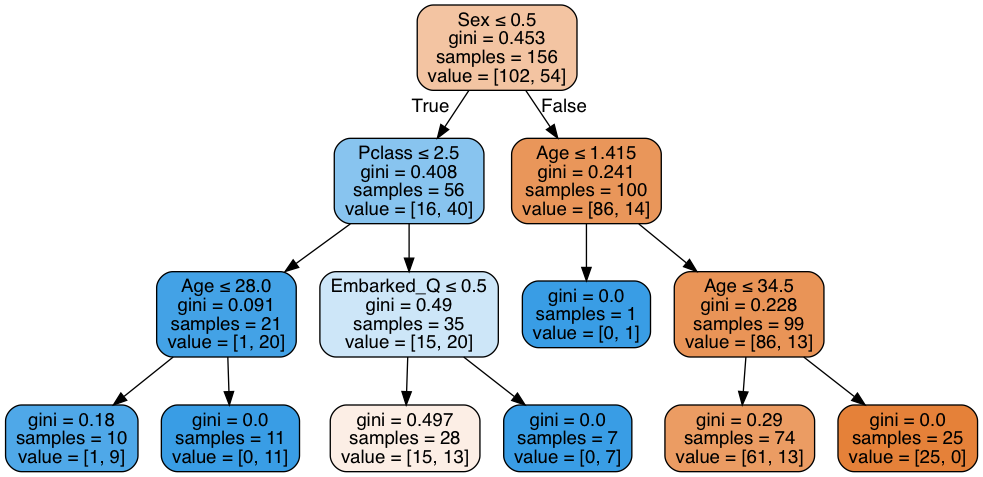

In [11]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(treeclf, out_file=None, feature_names=['Pclass','Sex','Age','Embarked_Q','Embarked_S'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

- Sex는 첫 번째 분할이다. 이것은 성별이 사고에서 살아남았는지 여부를 결정하는 가장 중요한 요소임을 의미한다.
- Embarked_Q는 어떤 분할에서도 사용되지는 않는다.

분류 또는 회귀 트리의 경우 의사 결정 트리를 사용해 매우 흥미로운 작업을 수행할 수 있다. 즉, 데이터 포인트를 예측할 때 각 특징의 중요성을 나타내는 숫자를 출력할 수 있다.

In [ ]:
pd.DataFrame({'feature': feature_cols, 'importance': treeclf.feature_importances_})

 중요성 점수는 각 변수에 대한 평균 지니 지수 차이이며, 높은 값은 예측에서 중요성이 높음에 해당한다. 이 정보를 사용해 앞으로 더 적은 수의 특징을 선택할 수 있다.  
예를 들어 모든 embarked 변수는 나머지 특징과 비교할 때 매우 낮기 때문에 삶이나 죽음에 대한 예측에서 중요하지 않다고 말할 수 있다.